<a href="https://colab.research.google.com/github/omartux/VA2023/blob/main/Trabajo_Encargado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Trabajo Encargado MCC 2023 Vision Artificial**

Omar Castillo<br>
Edwin Chambi Mamani<br>
Gludher Quispe Cotacallapa<br>
Erwin Cruz Mamani<br>


# Ecualizador


(800, 552)
(800, 552)


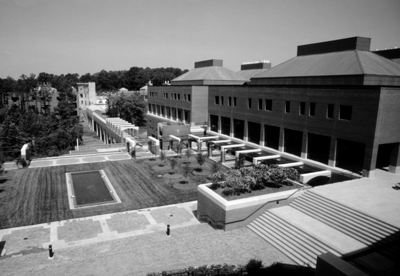

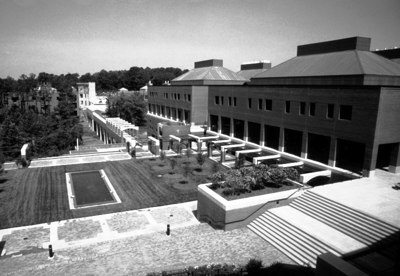

In [36]:
from PIL import Image
import requests
import cv2 as cv
import numpy as np

# Cargar imagen
url = 'https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg'
img = Image.open(requests.get(url, stream=True).raw)
#img = Image.open('archivo.jpg')

# Convertir a escala de grises
img_gray = img.convert('L')
im0 = img_gray.save("gris.jpg")

# Calcular histograma y CDF
histogram = img_gray.histogram()
cdf = [sum(histogram[:i+1]) for i in range(len(histogram))]

# Normalizar CDF
cdf_normalized = [(val - cdf[0]) * 255 / (img_gray.size[0] * img_gray.size[1] - cdf[0]) for val in cdf]

# Ecualizar imagen
img_ecualizada = img_gray.point(cdf_normalized)

#guardar imagen
img.save("original.jpg")
im1 = img_ecualizada.save("ecualizada.jpg")

#cambiar tamaño
print (img_gray.size)
x= (img_gray.size[0])
y= (img_gray.size[1])

print (img_ecualizada.size)
#print ()
im0_s = img_gray.resize((int(x/2), int(y/2)))
im1_s = img_ecualizada.resize((int(x/2), int(y/2)))

# Mostrar imagen
#img_gray.show()
#img_ecualizada.show()
im0_s.show(title = 'gris')
im1_s.show(title = 'ecualizada')
#concatenar imagen
#im0 = np.array(im0)
#im1 = np.array(im1)
#final_frame = cv.hconcat((im0, im1))
#final_frame = final_frame.convert('L')
#final_frame.show()


# Operadores

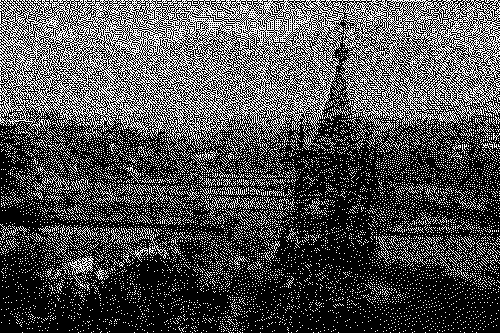

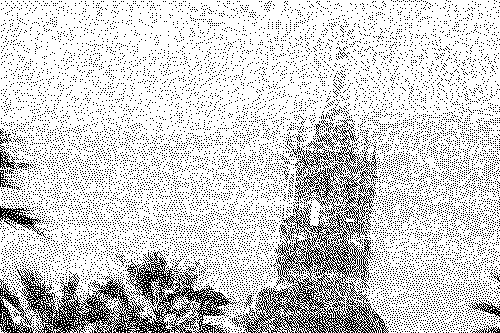

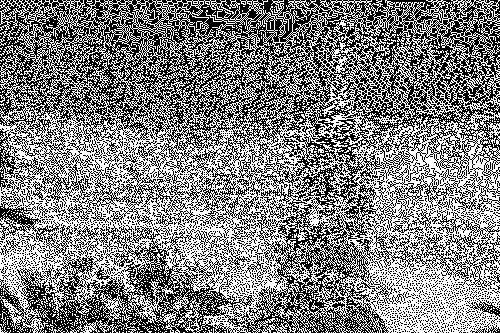

In [35]:
#Usando PIL
from PIL import Image, ImageChops
import requests

url1 = 'https://portal.andina.pe/EDPFotografia3/thumbnail/2018/08/08/000523965M.jpg'
url2 = 'https://portal.andina.pe/EDPfotografia2/Thumbnail/2008/05/30/000063839W.jpg'
img1 = Image.open(requests.get(url1, stream=True).raw)
img2 = Image.open(requests.get(url2, stream=True).raw)

img01 = img1.convert('1')
img02 = img2.convert('1')

#png soporta modo '1' JPG en PIL no
im1 = img01.save("im1g.png")
im2 = img02.save("im2g.png")

# Cargamos las dos imágenes
imagen_1 = Image.open('im1g.png')
imagen_2 = Image.open('im2g.png')

# Operador booleano AND
imagen_and = ImageChops.logical_and(imagen_1, imagen_2)
imagen_and.save('resultado_and.png')

# Operador booleano OR
imagen_or = ImageChops.logical_or(imagen_1, imagen_2)
imagen_or.save('resultado_or.png')

# Operador booleano XOR
imagen_xor = ImageChops.logical_xor(imagen_1, imagen_2)
imagen_xor.save('resultado_xor.png')

imagen_and.show()
imagen_or.show()
imagen_xor.show()

Como crear una mascara binaria en forma automatica... CON UN DETECTOR DE BORDE


# Convolucion de Media

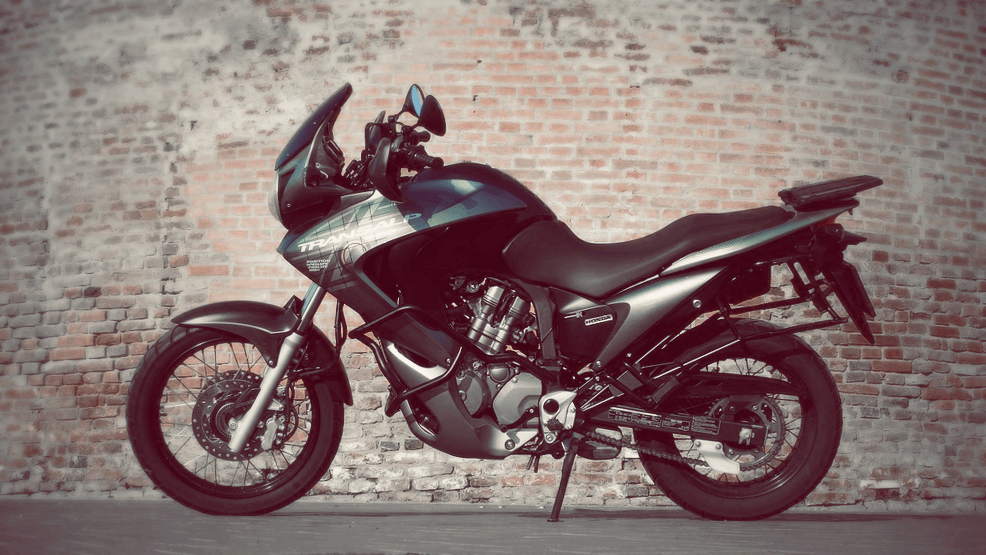

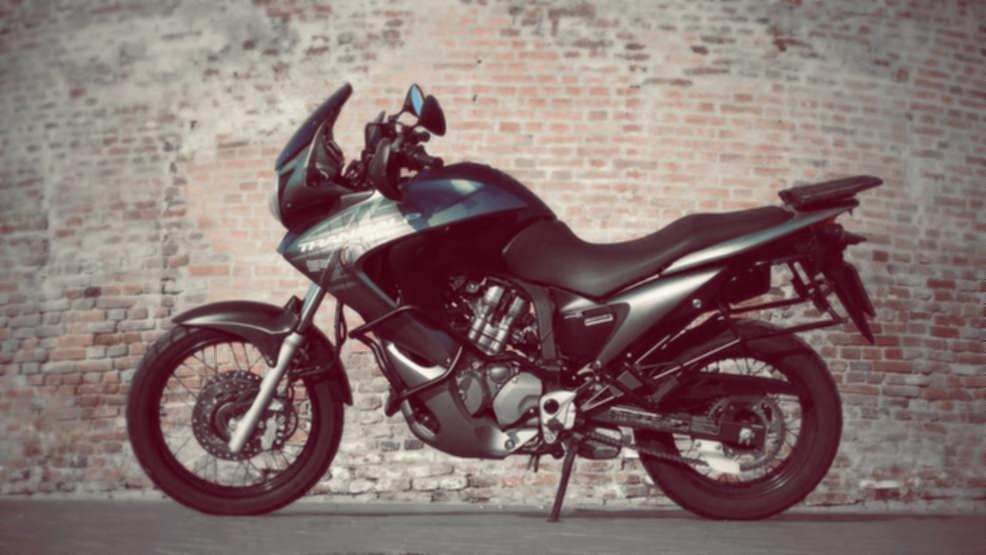

In [41]:
from PIL import Image, ImageFilter
import requests
direccion = 'https://bxrepsol.s3.eu-west-1.amazonaws.com/static/2023/02/24100233/que-es-que-en-una-moto-header.png'
moto = Image.open(requests.get(direccion, stream=True).raw)
moto = moto.convert('RGB')
moto.save('moto.jpg')
# Cargamos la imagen
imagen = Image.open('moto.jpg')

# Definimos el filtro de media por convolución
filtro = ImageFilter.Kernel((3, 3), (1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9))

# Aplicamos el filtro a la imagen
imagen_filtrada = imagen.filter(filtro)

# Guardamos la imagen filtrada
imagen_filtrada.save('imagen_filtrada.png')

#mostramos las fotos y la salida del filtro
moto.show()
imagen_filtrada.show()

# Filtro de Mediana

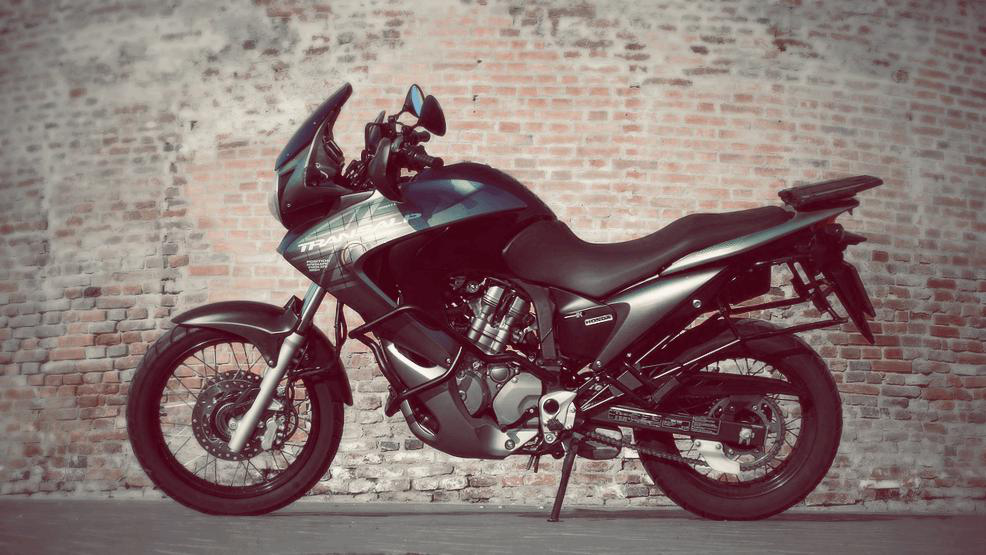

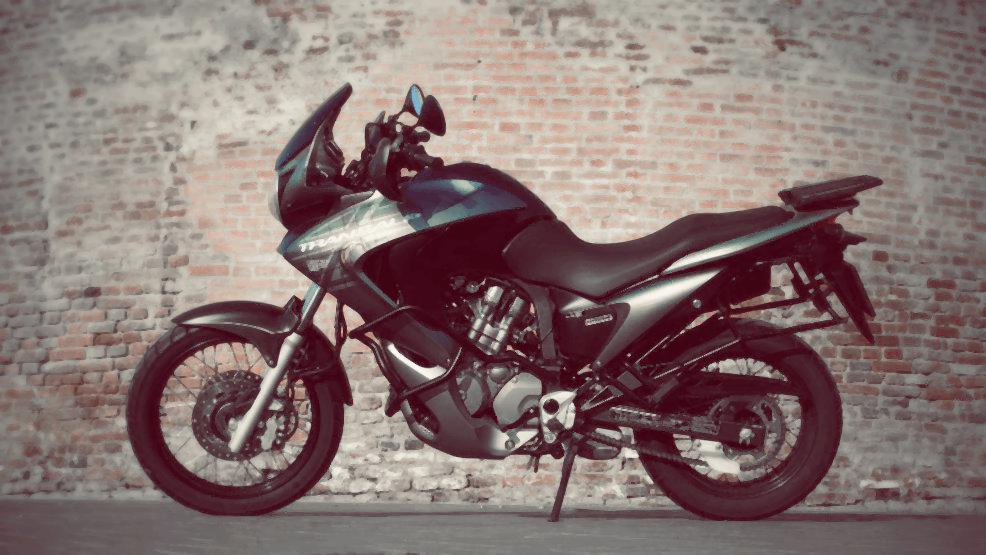

In [42]:
from PIL import Image

def median_filter(image, size):
    # Convertir la imagen en una matriz
    img_matrix = image.load()
    
    # Obtener las dimensiones de la imagen
    width, height = image.size
    
    # Crear una nueva imagen para el resultado
    result = Image.new(image.mode, image.size)
    result_matrix = result.load()
    
    # Calcular el tamaño de la ventana deslizante
    half_size = size // 2
    
    # Aplicar el filtro de mediana a cada píxel
    for x in range(width):
        for y in range(height):
            # Recopilar los valores de los píxeles en la ventana
            pixels = []
            for i in range(-half_size, half_size + 1):
                for j in range(-half_size, half_size + 1):
                    # Asegurarse de no salirse de los límites de la imagen
                    if (x+i >= 0 and x+i < width and y+j >= 0 and y+j < height):
                        pixels.append(img_matrix[x+i, y+j])
            
            # Ordenar los valores de los píxeles y tomar la mediana
            pixels.sort()
            median = pixels[len(pixels) // 2]
            
            # Establecer el valor del píxel en la imagen de salida
            result_matrix[x, y] = median
    
    return result

import requests
direccion = 'https://bxrepsol.s3.eu-west-1.amazonaws.com/static/2023/02/24100233/que-es-que-en-una-moto-header.png'
moto = Image.open(requests.get(direccion, stream=True).raw)
moto = moto.convert('RGB')
moto.save('moto.jpg')

# Cargar una imagen con PIL
image = Image.open("moto.jpg")

# Aplicar el filtro de mediana
filtered_image = median_filter(image, 3)

# Mostrar la imagen original y la filtrada
image.show()
filtered_image.show()


# Zoom Interpolacion

# Interpolacion